In [1]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
%matplotlib inline

In [2]:
# basic strategy
plt.style.use("dark_background")
ma_1 = 30
ma_2 = 100

start = dt.datetime.now() - dt.timedelta(days= 365 * 3)
end = dt.datetime.now()

data = web.DataReader("FB", "yahoo", start, end)
data[f"SMA_{ma_1}"] = data["Adj Close"].rolling(window=ma_1).mean()
data[f"SMA_{ma_2}"] = data["Adj Close"].rolling(window=ma_2).mean()

data = data.iloc[ma_2:]


data

,High,Low,Open,Close,Volume,Adj Close,SMA_30,SMA_100
Date,,,,,,,,
2019-04-16,180.169998,178.300003,179.000000,178.869995,11215200,178.869995,170.945666,155.070899
2019-04-17,180.740005,178.360001,179.600006,178.779999,9973700,178.779999,171.154666,155.534399
2019-04-18,178.880005,177.339996,178.800003,178.279999,11655600,178.279999,171.459666,155.968999
2019-04-22,181.669998,178.250000,178.250000,181.440002,13389900,181.440002,171.854332,156.466099
2019-04-23,184.220001,181.479996,182.740005,183.779999,19954800,183.779999,172.244666,156.940099
...,...,...,...,...,...,...,...,...
2021-11-10,333.190002,325.510010,332.489990,327.640015,21872600,327.640015,330.321668,350.402701
2021-11-11,332.459991,327.000000,329.820007,327.739990,12376600,327.739990,329.933334,350.289801
2021-11-12,341.859985,329.779999,330.179993,340.890015,25387200,340.890015,329.862668,350.292802


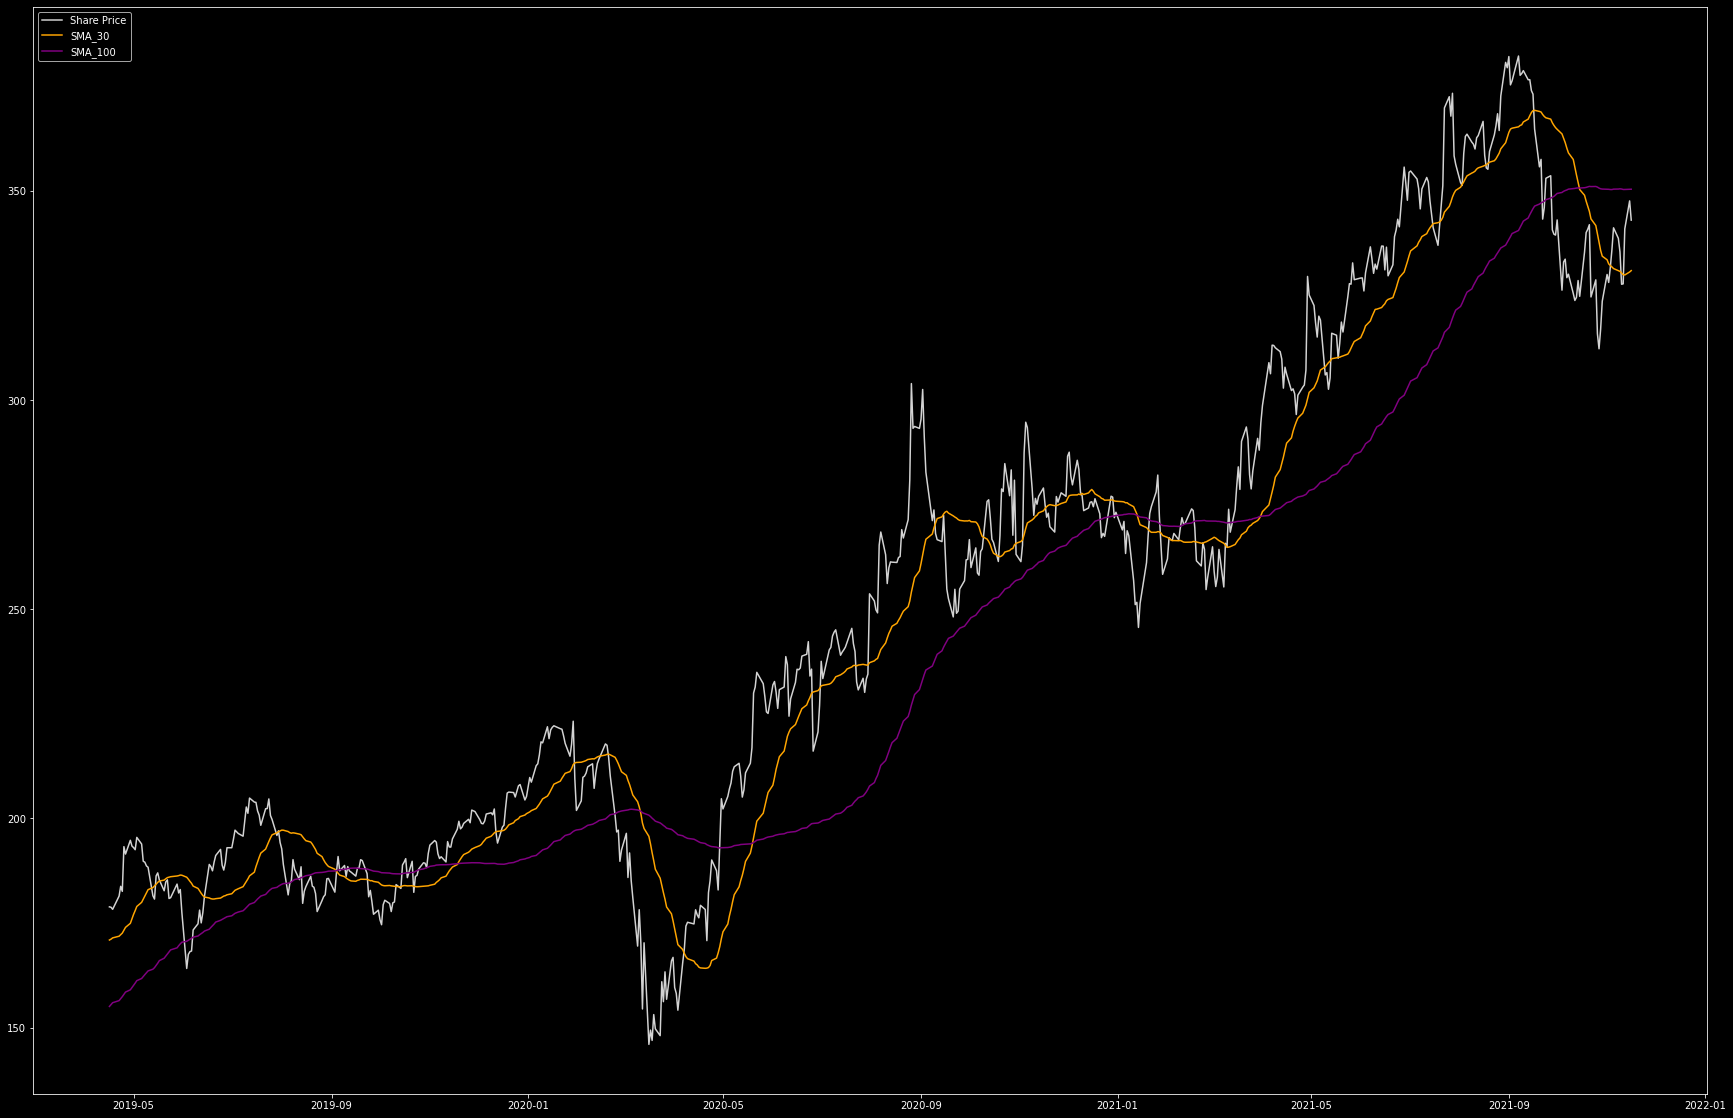

In [3]:
plt.subplots(figsize=(30, 20))
plt.plot(data["Adj Close"], label= "Share Price", color= "Lightgrey")
plt.plot(data[f"SMA_{ma_1}"], label = f"SMA_{ma_1}", color = "orange")
plt.plot(data[f"SMA_{ma_2}"], label = f"SMA_{ma_2}", color = "purple")

plt.legend(loc = "upper left")
plt.show()

In [8]:
buy_signals = []
sell_signals = []
trigger = 0

for x in range(len(data)):
    if data[f"SMA_{ma_1}"].iloc[x] > data[f"SMA_{ma_2}"].iloc[x] and trigger != 1:
        buy_signals.append(data["Adj Close"].iloc[x])
        sell_signals.append(float("nan"))
        trigger = 1 
    elif data[f"SMA_{ma_1}"].iloc[x] < data[f"SMA_{ma_2}"].iloc[x] and trigger != -1:
        buy_signals.append(float("nan"))
        sell_signals.append(data["Adj Close"].iloc[x])
        trigger = -1
    else: 
        buy_signals.append(float("nan"))
        sell_signals.append(float("nan"))
        
data["Buy Signals"] = buy_signals
data["Sell Signals"] = sell_signals



In [9]:
print(data.tail())


                  High         Low        Open       Close    Volume  \
Date                                                                   
2021-11-10  333.190002  325.510010  332.489990  327.640015  21872600   
2021-11-11  332.459991  327.000000  329.820007  327.739990  12376600   
2021-11-12  341.859985  329.779999  330.179993  340.890015  25387200   
2021-11-15  353.649994  343.200012  344.339996  347.559998  25076600   
2021-11-16  346.649994  340.869995  343.829987  342.959991  17484673   

             Adj Close      SMA_30     SMA_100  Buy Signals  Sell Signals  
Date                                                                       
2021-11-10  327.640015  330.321668  350.402701          NaN           NaN  
2021-11-11  327.739990  329.933334  350.289801          NaN           NaN  
2021-11-12  340.890015  329.862668  350.292802          NaN           NaN  
2021-11-15  347.559998  330.573667  350.336602          NaN           NaN  
2021-11-16  342.959991  330.907001  350

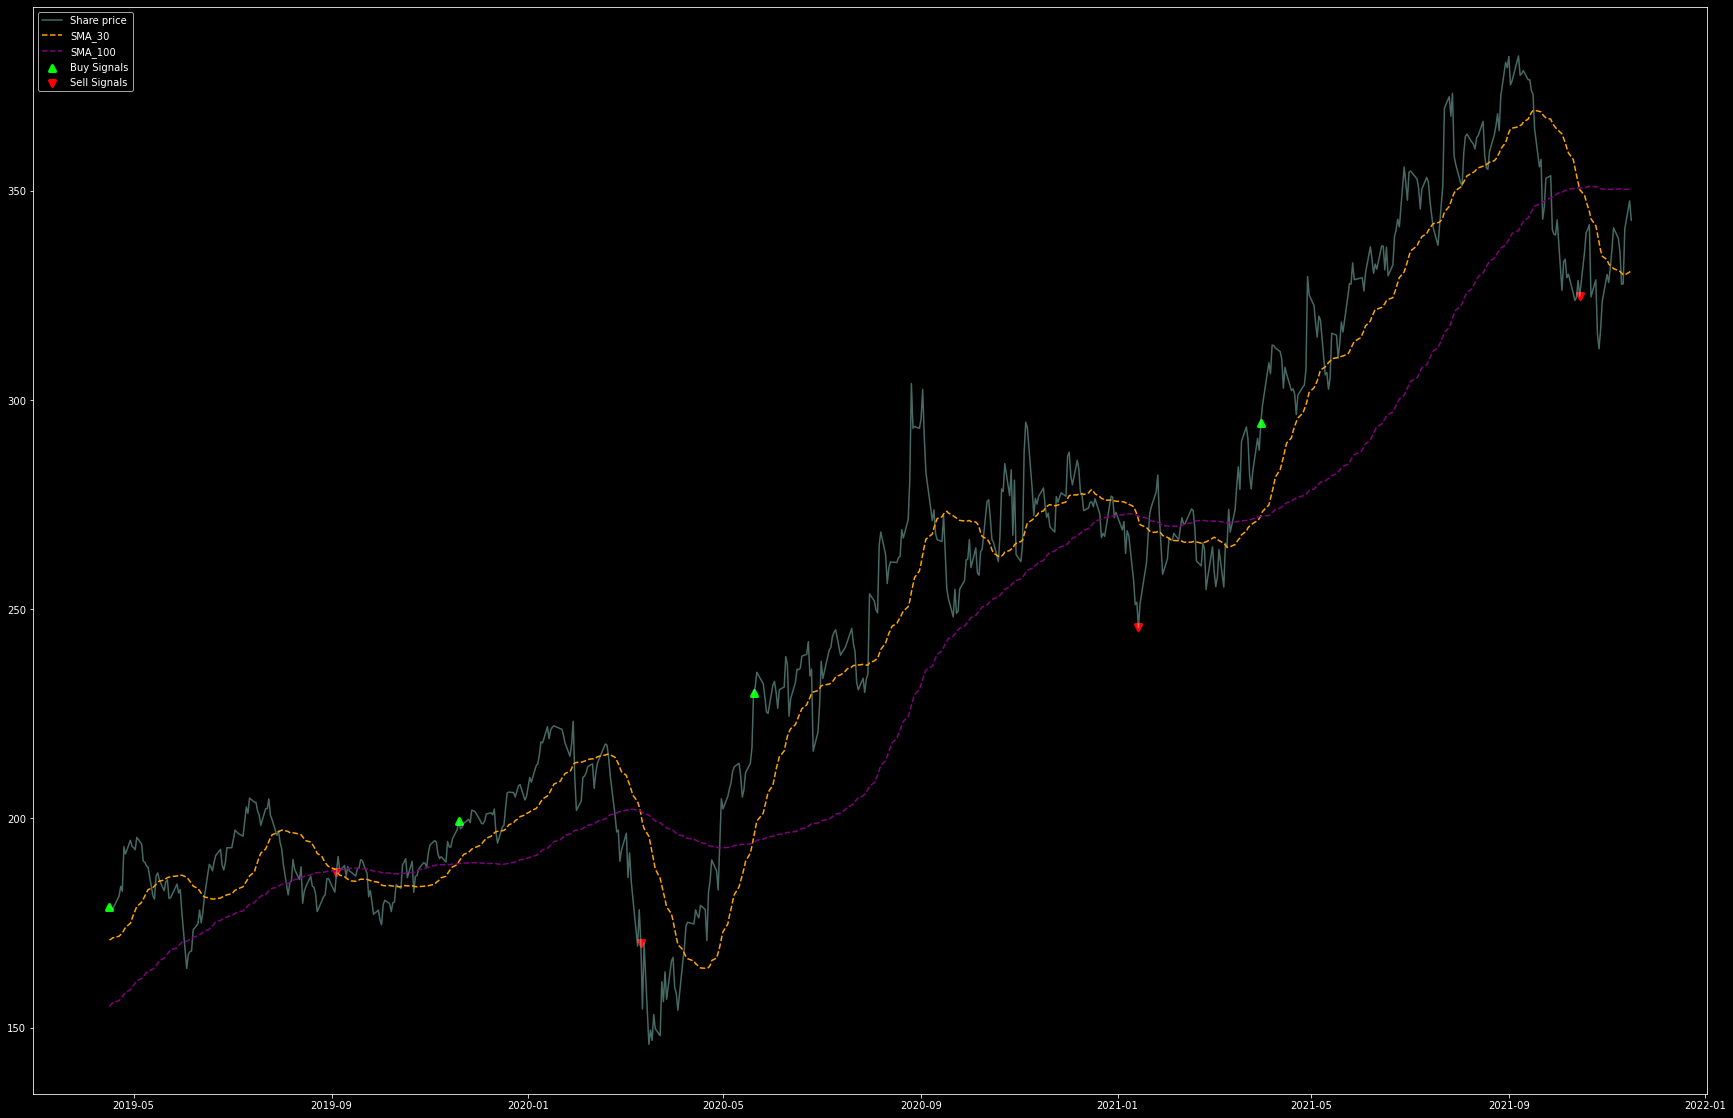

In [12]:
plt.subplots(figsize=(30, 20))
plt.plot(data["Adj Close"], label="Share price", alpha=0.5)
plt.plot(data[f"SMA_{ma_1}"], label = f"SMA_{ma_1}", color = "orange", linestyle = "--")
plt.plot(data[f"SMA_{ma_2}"], label = f"SMA_{ma_2}", color = "purple", linestyle = "--")
plt.scatter(data.index, data["Buy Signals"], label = "Buy Signals", marker = "^", 
            color = "#00ff00", lw=3)
plt.scatter(data.index, data["Sell Signals"], label = "Sell Signals", marker = "v", 
            color = "red", lw=3)
plt.legend(loc="upper left")
plt.show()